# K-medoids Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#callculating eucledian distance between x and y
def euclideanDistance(x, y):
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

In [3]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):

        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):

        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):

        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):

        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
    
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

## Generating data and testing the above implementation

In [152]:
import pandas as pd

def create_test_dataset(N=100):
    np.random.seed(2134)

    means = [[0, 0], [10, 5], [0, 10]]
    cov = [[2, 0], [0, 2]]

    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    K = 3

    original_label = np.asarray([0]*N + [1]*N + [2]*N).T
    
    return (X, original_label)
X, original_label = create_test_dataset(N = 150)

In [153]:
X_df = pd.DataFrame(X, columns = ["atribute_1", "atribute_2"])
labels_df = pd.DataFrame(original_label, columns=['label'])
X_df

,atribute_1,atribute_2
0,-0.724616,-1.239994
1,-0.845672,-1.910215
2,1.153479,0.343859
3,0.725128,0.204758
4,1.547134,1.128701
...,...,...
445,-1.328100,11.273850
446,2.323786,10.660843
447,-1.458875,8.842636
448,-0.315490,10.156046


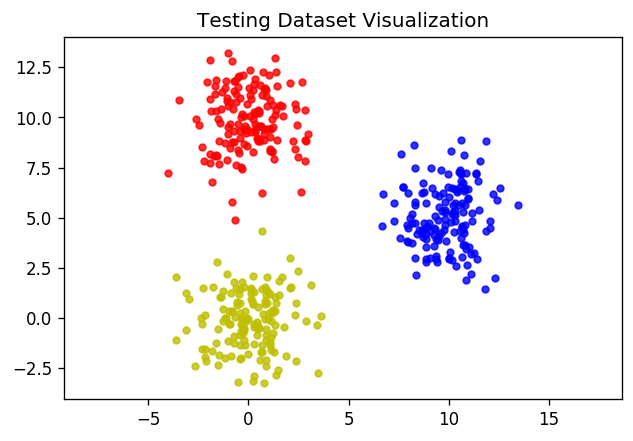

In [154]:
def visualize(X, label, title):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'yo', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.title(title)
    plt.plot()
    plt.show()
    
visualize(X, original_label, "Testing Dataset Visualization")

### K-medoids

Centers found by your model:
[[ 9.83100004  4.95611667]
 [ 0.2261975   9.90987548]
 [-0.01529028 -0.07922709]]


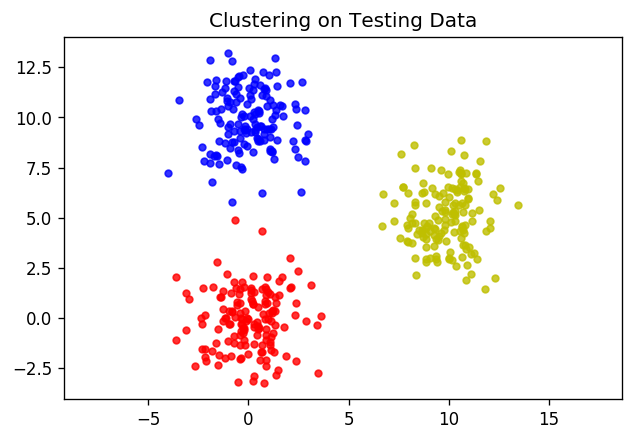

In [155]:
model=k_medoids(k=3, max_iter = 10000)
print('Centers found by your model:')
print(model.fit(X))

pred = model.predict(X)

visualize(X,pred, "Clustering on Testing Data")

#### Testing model time complexity based on max_iter

Time elapsed:
N = 600: 00:00:00
N = 1200: 00:00:01
N = 1800: 00:00:02
N = 2400: 00:00:06
N = 3000: 00:00:34
N = 3600: 00:00:14
N = 4200: 00:00:21
N = 4800: 00:00:27
N = 5400: 00:01:02
N = 6000: 00:00:43
N = 6600: 00:00:49
N = 7200: 00:01:47
N = 7800: 00:02:53
N = 8400: 00:02:17
N = 9000: 00:01:05
N = 9600: 00:01:47
N = 10200: 00:02:46
N = 10800: 00:10:42
N = 11400: 00:08:44
N = 12000: 00:02:52
N = 12600: 00:10:35
N = 13200: 00:02:26
N = 13800: 00:04:33
N = 14400: 00:04:28
N = 15000: 00:05:27
N = 15600: 00:05:35
N = 16200: 00:05:47
N = 16800: 00:08:44
N = 17400: 00:04:23


Text(0, 0.5, 'N')

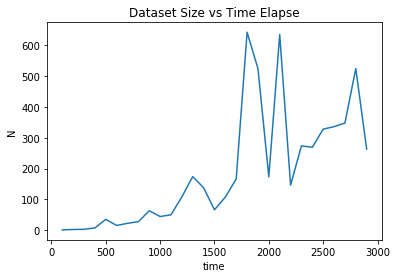

In [156]:
import time
times = []
iterations = []
print("Time elapsed:")
for i in range(100,3000,100):
    start_time = time.time()
    X, original_label = create_test_dataset(N = i)
    model=k_medoids(k=3, max_iter = X.size)
    model.fit(X)
    elapsed_time = time.time() - start_time
    print("N = "+str(X.size)+": " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
    times.append(elapsed_time)
    iterations.append(i)
    
plt.plot(iterations, times)
plt.title("Dataset Size vs Time Elapse")
plt.xlabel("time")
plt.ylabel("N")

### Testing on Iris Dataset

In [135]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

iris = datasets.load_iris()

In [136]:
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [137]:
pd.DataFrame(iris.target).describe()

,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [143]:
X = []
X = iris.data
y = iris.target

In [144]:
# #adding outlayers
# X = np.append(X, np.array([[100, 100, 100, 100], [100, 20, 1000, 20], [45, 47, 29, 51]]), axis=0)
# y = np.append(y, [0,1,2], axis=0)

Text(0, 0.5, 'Petal Width')

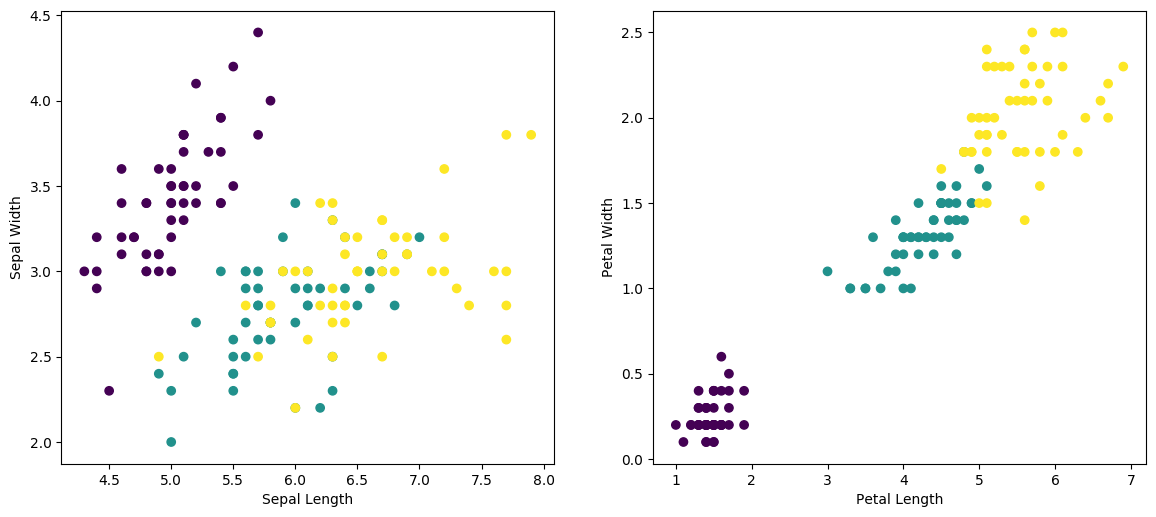

In [145]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')

In [146]:
import random
train_indexes = random.sample(range(150),100)
#adding outlayers
# train_indexes.append(150)
# train_indexes.append(151)
# train_indexes.append(152)

test_indexes = [x for x in list(range(0,150)) if x not in list(train_indexes)]
X_train = X[train_indexes, :]
X_test = X[test_indexes, :]
y=y[test_indexes]

#k-medoid, own implementation
model=k_medoids(k=3, max_iter = 200)
model.fit(X_train)
labels_own_kmedoid = model.predict(X_test)

#k-medoid, sklearn
model_sklearn = KMedoids(n_clusters=3, random_state=12412).fit(X_train)
labels_sklearn_kmedoid = model_sklearn.predict(X_test)

#kmeans, sklearn
model_kmeans = KMeans(n_clusters=3).fit(X_train)
labels_sklearn_kmeans = model_kmeans.predict(X_test)

Text(0.5, 1.0, 'K-means, Sklearn')

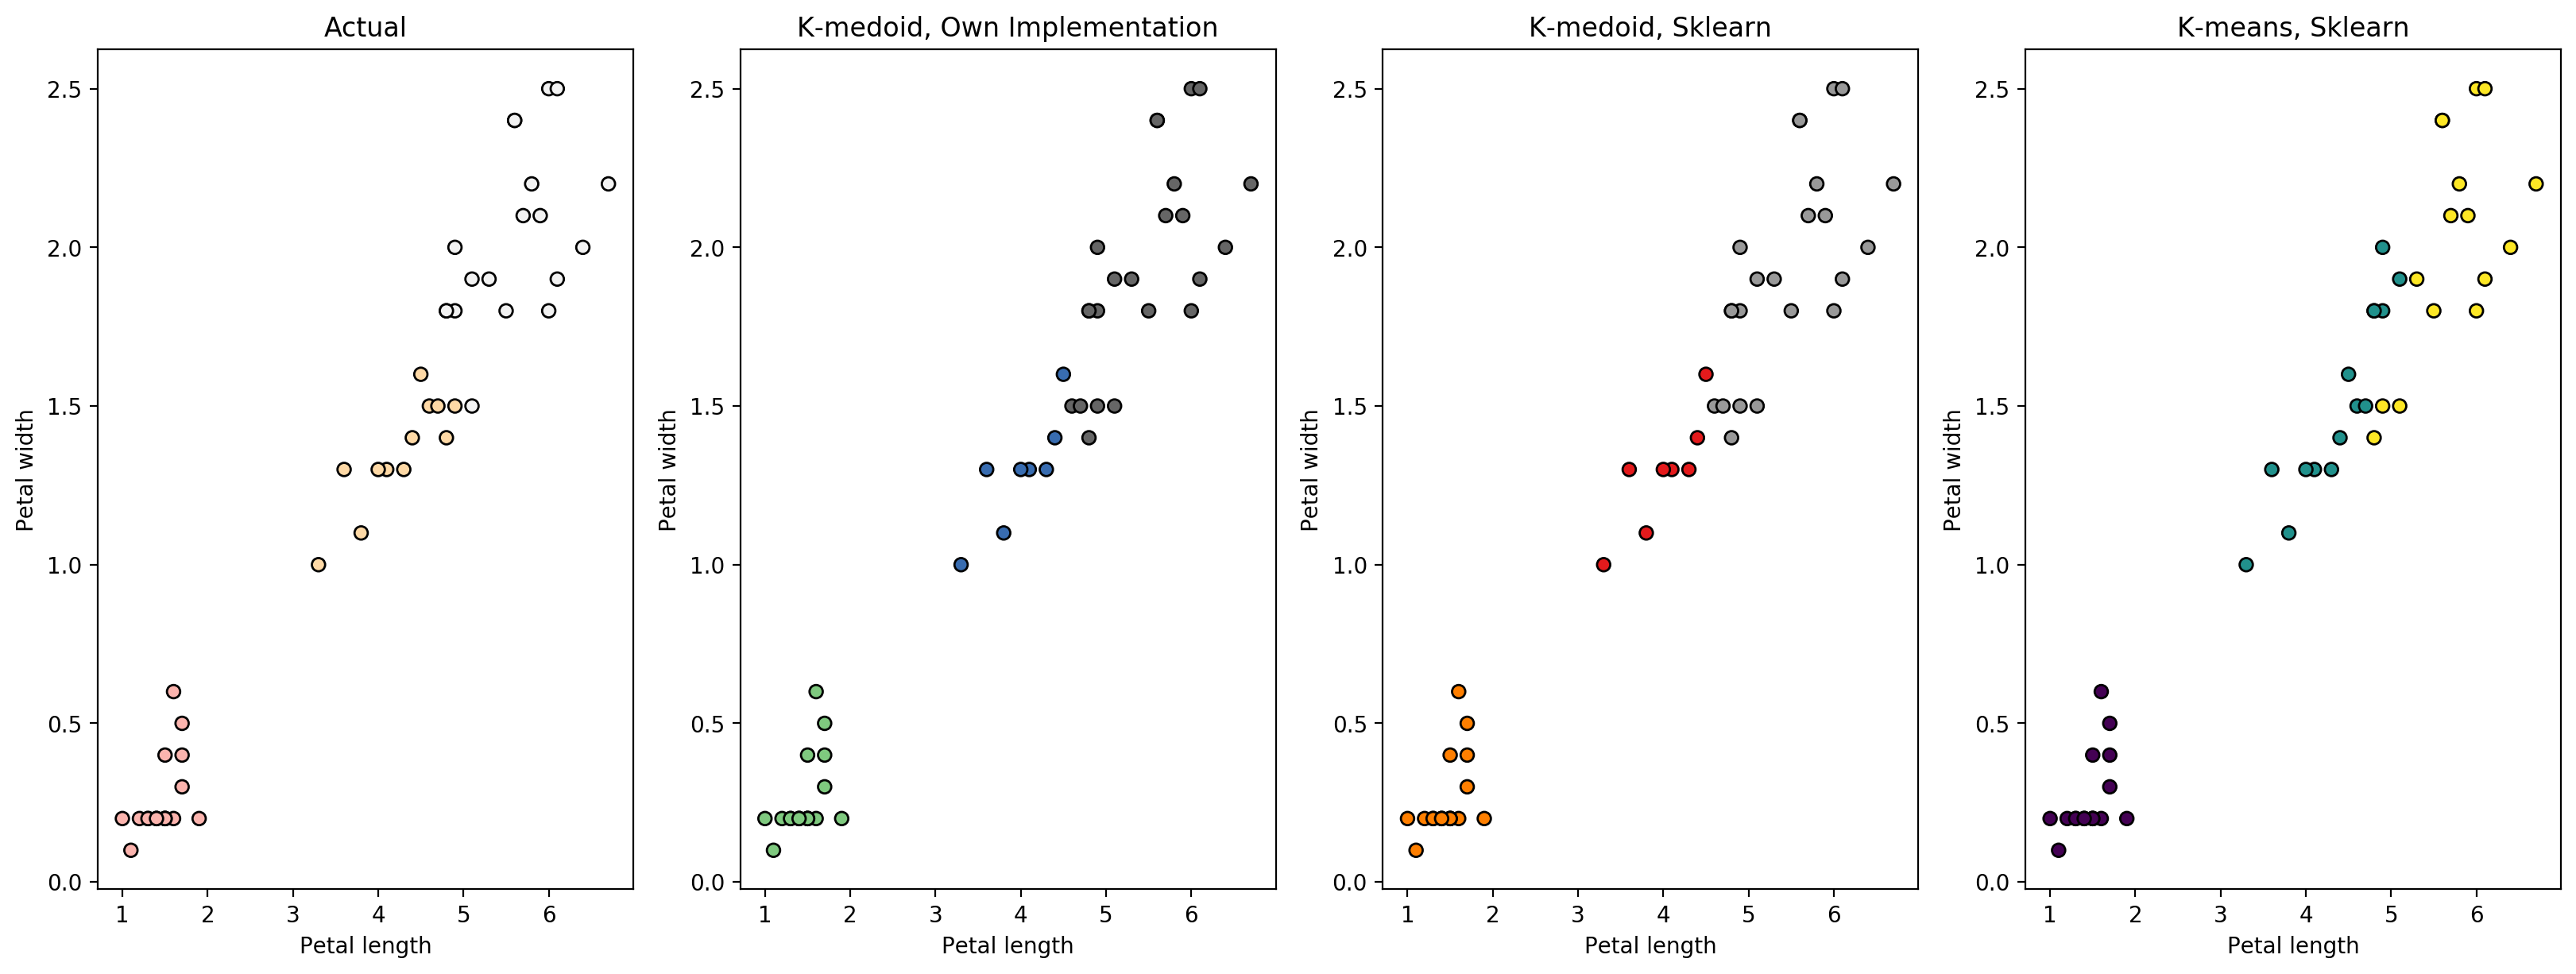

In [147]:
#Plot the identified clusters and compare with our result

fig, axes = plt.subplots(1, 4, figsize=(20,7),dpi=200)
axes[0].scatter(X_test[:, 2], X_test[:, 3], c=y, cmap='Pastel1', edgecolor='k')
axes[1].scatter(X_test[:, 2], X_test[:, 3], c=labels_own_kmedoid, cmap='Accent', edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('K-medoid, Own Implementation')
axes[2].scatter(X_test[:, 2], X_test[:, 3], cmap='Set1', c=labels_sklearn_kmedoid, edgecolor='k')
axes[3].scatter(X_test[:, 2], X_test[:, 3], c=labels_sklearn_kmeans, edgecolor='k')
axes[2].set_xlabel('Petal length')
axes[2].set_ylabel('Petal width')
axes[3].set_xlabel('Petal length')
axes[3].set_ylabel('Petal width')
axes[2].set_title('K-medoid, Sklearn')
axes[3].set_title('K-means, Sklearn')

In [148]:
def callculate_accuracy(model_name, labels):
    diff = 0
    cluster_num = 3
    for i in range(0, cluster_num):
        count_y = 0
        count_labels = 0
        for j in range(len(y)):
            if y[j] == i:
                count_y += 1
            if labels[j] == i:
                count_labels += 1
        diff += abs(count_y - count_labels)
    accuracy = ((len(y) - diff)/len(y))*100
    return (accuracy, diff)

In [149]:
def cross_validation(n = 200):
    accuracy_sum_train, accuracy_sum_test, diff_sum_train, diff_sum_test = (0, ) *4
    for i in range(n):
        model=k_medoids(k=3, max_iter = 200)
        model.fit(X_train)
        labels_own_kmedoid = model.predict(X_test)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_own_kmedoid)
        accuracy_sum_test +=accuracy
        diff_sum_test +=diff

        labels_own_kmedoid = model.predict(X_train)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_own_kmedoid)
        accuracy_sum_train +=accuracy
        diff_sum_train +=diff
    return (accuracy_sum_test/n, diff_sum_test/n, accuracy_sum_train/n, diff_sum_train/n)
(accuracy_test,diff_test, accuracy_train,diff_train) = cross_validation()
print("*******my k-medoid*********")
print("Diff test = ",diff_test)
print("Accuracy test = ",accuracy_test)
print("Diff train = ",diff_train)
print("Accuracy train = ",accuracy_train)

*******my k-medoid*********
Diff test =  15.12
Accuracy test =  69.76
Diff train =  15.81
Accuracy train =  68.38


In [150]:
def cross_validation(n = 200):
    accuracy_sum_train, accuracy_sum_test, diff_sum_train, diff_sum_test = (0, ) *4
    for i in range(n):
        model_sklearn = KMedoids(n_clusters=3, random_state=12412).fit(X_train)
        labels_sklearn_kmedoid = model_sklearn.predict(X_test)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_sklearn_kmedoid)
        accuracy_sum_test +=accuracy
        diff_sum_test +=diff

        labels_sklearn_kmedoid = model_sklearn.predict(X_train)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_sklearn_kmedoid)
        accuracy_sum_train +=accuracy
        diff_sum_train +=diff
    return (accuracy_sum_test/n, diff_sum_test/n, accuracy_sum_train/n, diff_sum_train/n)
(accuracy_test,diff_test, accuracy_train,diff_train) = cross_validation()
print("*******sklearn k-medoid*********")
print("Diff test = ",diff_test)
print("Accuracy test = ",accuracy_test)
print("Diff train = ",diff_train)
print("Accuracy train = ",accuracy_train)

*******sklearn k-medoid*********
Diff test =  22.0
Accuracy test =  56.00000000000001
Diff train =  14.0
Accuracy train =  72.0


In [151]:
def cross_validation(n = 200):
    accuracy_sum_train, accuracy_sum_test, diff_sum_train, diff_sum_test = (0, ) *4
    for i in range(n):
        model_kmeans = KMeans(n_clusters=3).fit(X_train)
        labels_sklearn_kmeans = model_kmeans.predict(X_test)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_sklearn_kmeans)
        accuracy_sum_test +=accuracy
        diff_sum_test +=diff

        labels_sklearn_kmeans = model_kmeans.predict(X_train)
        accuracy, diff = callculate_accuracy('K-medoid, Own Implementation', labels_sklearn_kmeans)
        accuracy_sum_train +=accuracy
        diff_sum_train +=diff
    return (accuracy_sum_test/n, diff_sum_test/n, accuracy_sum_train/n, diff_sum_train/n)
(accuracy_test,diff_test, accuracy_train,diff_train) = cross_validation()
print("*******sklearn k-means*********")
print("Diff test = ",diff_test)
print("Accuracy test = ",accuracy_test)
print("Diff train = ",diff_train)
print("Accuracy train = ",accuracy_train)

*******sklearn k-means*********
Diff test =  9.06
Accuracy test =  81.88
Diff train =  10.18
Accuracy train =  79.64
